**Step 1 - Input and modify data**

In [3]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#import dataset using pandas

data = pd.read_csv("fashion-mnist_train.csv")

test = pd.read_csv("fashion-mnist_test.csv")


In [5]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.shape

(10000, 785)

In [8]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_val = data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

test = np.array(test)
p, q = test.shape
np.random.shuffle(test)

data_test = test[0:p].T
Y_test = data_test[0]
X_test = data_test[1:q]/ 255
data_test = data_test

**Step 2 - Generate parameters (weights and biases)**

In [9]:
#initiate weight (w) and biases (b)

def init_params():
  W1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

**Step 3 - Create Forward Propagation function**

In [10]:
#define layer 1 activation function (ReLU)
def ReLU(Z):
  return np.maximum (Z, 0)

#define layer 2 activation function (Softmax)
def softmax(Z):
  exp = np.exp(Z - np.max(Z))
  return exp / exp.sum(axis=0)

#define forward propagation function using ReLU and Softmax
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2




**Step 4 - Create Back Propagation function**

In [11]:
#Encode Y compare with predictions from forward propagation
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

#compute derivative of ReLU function
def deriv_ReLU(Z):
  return Z > 0


#define back propagation function using by computing differentials
def back_prop (Z1, A1, Z2, A2, W1, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y # computes loss by comparing prediction with label Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

# update W1, b1, W2, b2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

**Step 5 - Create Gradient Descent function**

In [12]:
m = Y_train.size
m

59000

In [13]:
# compute predictions

def get_predictions(A2):
  return np.argmax(A2, 0)

# compute accuracy

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

#define gradient descent function
def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i % 10 == 0):
      print("iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

  return W1, b1, W2, b2


**Test Results**

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

iteration:  0
[8 8 8 ... 8 8 8] [8 6 7 ... 9 4 0]
Accuracy:  0.09952542372881355
iteration:  10
[4 4 8 ... 7 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.2612372881355932
iteration:  20
[4 4 8 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.35223728813559324
iteration:  30
[4 4 8 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.4184406779661017
iteration:  40
[6 6 8 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.4794406779661017
iteration:  50
[6 6 8 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.5348983050847458
iteration:  60
[8 6 5 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.5736610169491525
iteration:  70
[8 6 5 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.6027627118644068
iteration:  80
[8 6 5 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.6241186440677966
iteration:  90
[8 6 5 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.6436779661016949
iteration:  100
[8 6 5 ... 9 2 8] [8 6 7 ... 9 4 0]
Accuracy:  0.6606271186440678
iteration:  110
[8 4 5 ... 9 4 8] [8 6 7 ... 9 4 0]
Accuracy:  0.6443728813559322
iteration:  120
[8 4 5 ..

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def validate_prediction(index, W1, b1, W2, b2):
    current_image = X_val[:, index, None]
    prediction = make_predictions(X_val[:, index, None], W1, b1, W2, b2)
    label = Y_val[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

**Labels**




*  0 T-shirt/top
*  1 Trouser
*  2 Pullover
*  3 Dress
*  4 Coat
*  5 Sandal
*  6 Shirt
*  7 Sneaker
*  8 Bag
*  9 Ankle boot



Prediction:  [4]
Label:  6


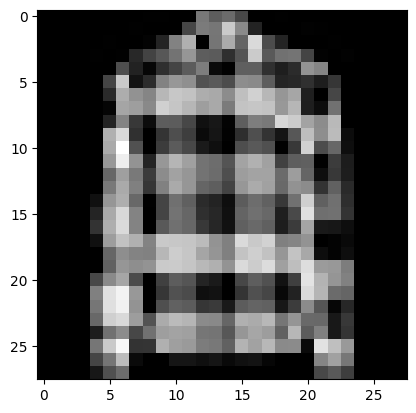

Prediction:  [4]
Label:  4


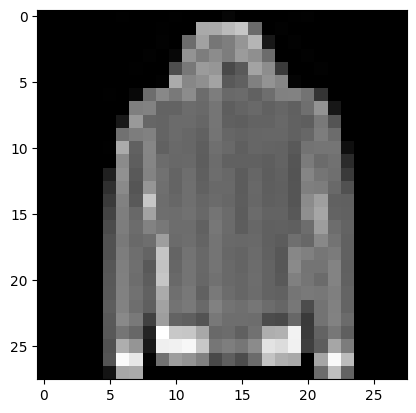

Prediction:  [8]
Label:  4


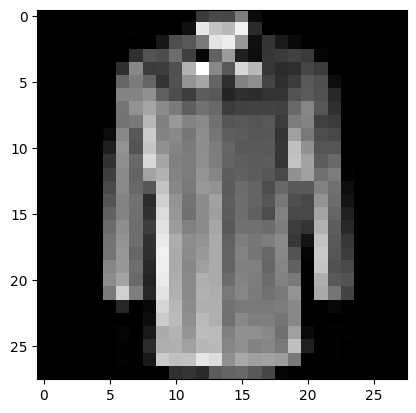

Prediction:  [0]
Label:  0


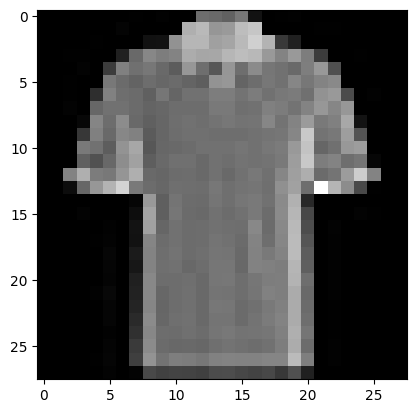

Prediction:  [7]
Label:  7


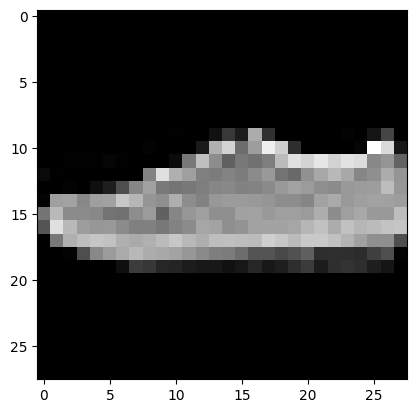

In [16]:
validate_prediction(0, W1, b1, W2, b2)
validate_prediction(1, W1, b1, W2, b2)
validate_prediction(2, W1, b1, W2, b2)
validate_prediction(3, W1, b1, W2, b2)
validate_prediction(55, W1, b1, W2, b2)

In [17]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)

get_accuracy(test_predictions, Y_test)



[4 1 5 ... 0 3 4] [4 1 5 ... 0 3 4]


0.7717